In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
# Load the dataset
df = pd.read_csv('Housing.csv')

In [3]:
# Data preprocessing
# Convert yes/no to 1/0
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
df[binary_cols] = df[binary_cols].apply(lambda x: x.map({'yes': 1, 'no': 0}))

In [4]:
# Convert furnishingstatus to numerical values
df['furnishingstatus'] = df['furnishingstatus'].map({'unfurnished': 0, 'semi-furnished': 1, 'furnished': 2})

# Simple Linear Regression (Price vs Area)
X_simple = df[['area']]
y_simple = df['price']

In [5]:
# Split data
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_simple, y_simple, test_size=0.2, random_state=42)

# Train model
model_simple = LinearRegression()
model_simple.fit(X_train_s, y_train_s)

# Predictions
y_pred_s = model_simple.predict(X_test_s)

In [6]:
# Evaluation
print("Simple Linear Regression Results:")
print(f"MAE: {mean_absolute_error(y_test_s, y_pred_s)}")
print(f"MSE: {mean_squared_error(y_test_s, y_pred_s)}")
print(f"R²: {r2_score(y_test_s, y_pred_s)}")

Simple Linear Regression Results:
MAE: 1474748.1337969352
MSE: 3675286604768.185
R²: 0.27287851871974644


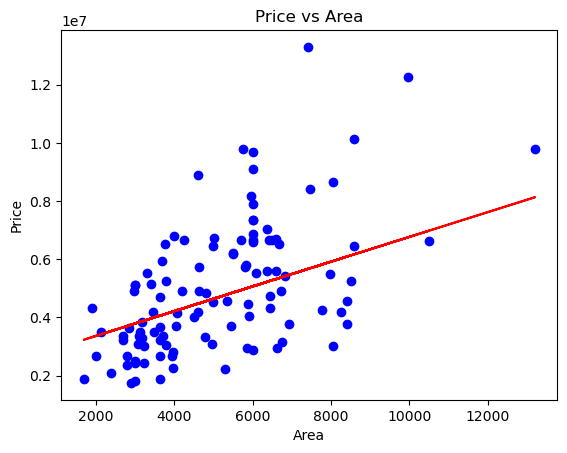

In [7]:
# Plot
plt.scatter(X_test_s, y_test_s, color='blue')
plt.plot(X_test_s, y_pred_s, color='red')
plt.title('Price vs Area')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

In [8]:
# Multiple Linear Regression
X_multi = df.drop('price', axis=1)
y_multi = df['price']

# Split data
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)



In [9]:
# Train model
model_multi = LinearRegression()
model_multi.fit(X_train_m, y_train_m)

# Predictions
y_pred_m = model_multi.predict(X_test_m)



In [10]:
# Evaluation
print("\nMultiple Linear Regression Results:")
print(f"MAE: {mean_absolute_error(y_test_m, y_pred_m)}")
print(f"MSE: {mean_squared_error(y_test_m, y_pred_m)}")
print(f"R²: {r2_score(y_test_m, y_pred_m)}")

# Coefficients interpretation
coefficients = pd.DataFrame({
    'Feature': X_multi.columns,
    'Coefficient': model_multi.coef_
})
print("\nFeature Coefficients:")
print(coefficients)


Multiple Linear Regression Results:
MAE: 979679.6912959901
MSE: 1771751116594.0344
R²: 0.6494754192267804

Feature Coefficients:
             Feature   Coefficient
0               area  2.358488e+02
1           bedrooms  7.857449e+04
2          bathrooms  1.097117e+06
3            stories  4.062232e+05
4           mainroad  3.668242e+05
5          guestroom  2.331468e+05
6           basement  3.931598e+05
7    hotwaterheating  6.878813e+05
8    airconditioning  7.855506e+05
9            parking  2.257565e+05
10          prefarea  6.299017e+05
11  furnishingstatus  2.103971e+05
